In [3]:
# Packages requires to load the dataset
using Pkg
Pkg.add("DataFrames")
using DataFrames

    Updating registry at `C:\Users\Holos Media\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\Holos Media\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\Holos Media\.julia\environments\v1.7\Manifest.toml`


In [1]:
date = [1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,
    2012,2013,2014,2015,2016,2017,2018,2019]
    
pop = [2,1,4,2,1,4,2,2,1,6,7,7,8,8,8,8,11,11,13,21,21,36,24,41,46,46,59,53]

28-element Vector{Int64}:
  2
  1
  4
  2
  1
  4
  2
  2
  1
  6
  7
  7
  8
  ⋮
 11
 11
 13
 21
 21
 36
 24
 41
 46
 46
 59
 53

In [4]:
df = DataFrame( varx = date, vary = pop)

,varx,vary
,Int64,Int64
1,1992,2
2,1993,1
3,1994,4
4,1995,2
5,1996,1
6,1997,4
7,1998,2
8,1999,2
9,2000,1


In [5]:
# Variables length
println(typeof((date, pop)), "\n date:", length(date), "\n pop :", length(pop))

Tuple{Vector{Int64}, Vector{Int64}}
 date:28
 pop :28


## Plot series to check supposed break point

In [6]:
# Packages requires to data visualization
#using Pkg
Pkg.add("Plots")

   Resolving package versions...
   Installed GR_jll ─────────────────────── v0.64.2+0
   Installed JpegTurbo_jll ──────────────── v2.1.2+0
   Installed libfdk_aac_jll ─────────────── v2.0.2+0
   Installed Opus_jll ───────────────────── v1.3.2+0
   Installed Libmount_jll ───────────────── v2.35.0+0
   Installed LERC_jll ───────────────────── v3.0.0+1
   Installed x265_jll ───────────────────── v3.5.0+0
   Installed Xorg_xkbcomp_jll ───────────── v1.4.2+4
   Installed RelocatableFolders ─────────── v0.1.3
   Installed EarCut_jll ─────────────────── v2.2.3+0
   Installed Measures ───────────────────── v0.3.1
   Installed Grisu ──────────────────────── v1.0.2
   Installed StaticArrays ───────────────── v1.4.3
   Installed Contour ────────────────────── v0.5.7
   Installed Xorg_xcb_util_wm_jll ───────── v0.4.1+1
   Installed Xorg_xcb_util_image_jll ────── v0.4.0+1
   Installed PlotUtils ──────────────────── v1.2.0
   Installed Xorg_libpthread_stubs_jll ──── v0.1.0+3
   Installed Cairo_jll 

  ✓ Xorg_xcb_util_keysyms_jll
  ✓ Xorg_xcb_util_wm_jll
  ✓ Xorg_libXfixes_jll
  ✓ Xorg_libxkbfile_jll
  ✓ Xorg_libXext_jll
  ✓ Xorg_libXrender_jll
  ✓ Xorg_xkbcomp_jll
  ✓ Libglvnd_jll
  ✓ Xorg_libXinerama_jll
  ✓ Xorg_libXi_jll
  ✓ Cairo_jll
  ✓ Xorg_libXcursor_jll
  ✓ Xorg_libXrandr_jll
  ✓ Xorg_xkeyboard_config_jll
  ✓ HarfBuzz_jll
  ✓ GLFW_jll
  ✓ xkbcommon_jll
  ✓ libass_jll
  ✓ ColorSchemes
  ✓ Qt5Base_jll
  ✓ FFMPEG_jll
  ✓ FFMPEG
  ✓ GR_jll
  ✓ PlotUtils
  ✓ GR
  ✓ RecipesPipeline
  ✓ PlotThemes
  ✓ Plots
  105 dependencies successfully precompiled in 631 seconds (41 already precompiled, 1 skipped during auto due to previous errors)


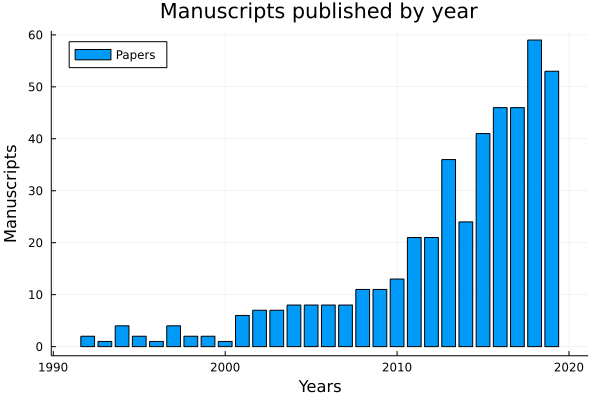

In [7]:
# Plot
using Plots
axis_x, axis_y = df[:,:varx], df[:,:vary]
bar(axis_x, axis_y, label = "Papers", legend = :topleft)
title!("Manuscripts published by year")
xaxis!("Years")
yaxis!("Manuscripts")

## Get the sum of the squares of the residuals (total, before and after break point) 

In [8]:
# Define time series for Chow test:
#point break = 2010
start_df1, end_df1 = 1992, 2010                                      # range for series 1 (obs:"end_df1 = point break")
start_df2, end_df2 = end_df1+1, 2019                                 # range for series 2
df1 = filter(r -> r.varx >= start_df1 && r.varx <= end_df1, df)      # time series before point break
df2 = filter(r -> r.varx >= start_df2 && r.varx <= end_df2, df)      # time series after point break

,varx,vary
,Int64,Int64
1,2011,21
2,2012,21
3,2013,36
4,2014,24
5,2015,41
6,2016,46
7,2017,46
8,2018,59
9,2019,53


In [9]:
# Variables for Chow test:
x , y = copy(df[:,:varx]), copy(df[:,:vary])         # variables from original dataset
x1 , y1 = copy(df1[:,:varx]), copy(df1[:,:vary])     # variables from series before point break
x2 , y2 = copy(df2[:,:varx]), copy(df2[:,:vary])     # variables from series after point break

([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], [21, 21, 36, 24, 41, 46, 46, 59, 53])

In [10]:
# Alternative formulas ***************************************************************************************************
# Original dataset ----------------------------------------------------------------------------------------------- 
k = 2                                        # number of samples (series before and after point break)
n = length(x)                                # total scores from original dataset
sum_x, sum_y = sum(x), sum(y)                # sum of independent and dependent variables from original series
mean_x, mean_y = sum(x)/n, sum(y)/n          # average of independent and dependent variables from original series
SSxy = sum((x.-mean_x).*(y.-mean_y))         # covariance of X and Y
SSxx = sum((x.-mean_x).^2)                   # variance in X
b = SSxy/SSxx                                # regression coefficient
a = mean_y - b*mean_x                        # intercept
yi = a .+ b.*x                               # estimated (or predicted) y value for observation i
RSSp = sum((y .- yi).^2)                     # Resiual sum of square (errors)
# Series 1 ------------------------------------------------------------------------------------------------------ 
n1 = length(x1)                              # total scores from series 1
gl1 = n1 - k                                 # numerator degrees freedom
sum_x1, sum_y1 = sum(x1), sum(y1)            # sum of independent and dependent variables from series 1
mean_x1, mean_y1 = sum(x1)/n1, sum(y1)/n1    # average of independent and dependent variables from series 1
SSxy1 = sum((x1.-mean_x1).*(y1.-mean_y1))    # covariance of X1 and Y1
SSxx1 = sum((x1.-mean_x1).^2)                # variance in X1
b1 = SSxy1/SSxx1                             # regression coefficient (series 1)
a1 = mean_y1 - b1*mean_x1                    # intercept (series 1)
yi1 = a1 .+ b1.*x1                           # estimated y value for observation i (series 1)
RSS1 = sum((y1 .- yi1).^2)                   # Residual sum of square before break
# Series 2 ------------------------------------------------------------------------------------------------------ 
n2 = length(x2)                              # total scores from series 2
gl2 = n2 - k                                 # denominator degrees freedom
sum_x2, sum_y2 = sum(x2), sum(y2)            # sum of independent and dependent variables from series 2
mean_x2, mean_y2 = sum(x2)/n2, sum(y2)/n2    # average of independent and dependent variables from series 2
SSxy2 = sum((x2.-mean_x2).*(y2.-mean_y2))    # covariance of X2 and Y2
SSxx2 = sum((x2.-mean_x2).^2)                # variance in X2
b2 = SSxy2/SSxx2                             # regression coefficient (series 2)
a2 = mean_y2 - b2*mean_x2                    # intercept (series 2)
yi2 = a2 .+ b2.*x2                           # estimated y value for observation i (series 2)
RSS2 = sum((y2 .- yi2).^2)                   # Residual sum of square after break

233.95555555557337

## Calculated F

In [11]:
RSS12 = RSS1 + RSS2
F_calc = ((RSSp - RSS12)/k)/(RSS12/(n1+n2-2*k))
F_calc = convert(Float64, F_calc)

71.55466907986296

## $F$ table & $F$ Critical 

In [12]:
N2 = [1,1,1,2,2,2,2,3,3,3,3,4,4,4,4,5,5,5,5,6,6,6,6,7,7,7,7,8,8,8,8,9,9,9,9,10,10,10,10,11,11,11,11,12,12,12,12,13,13,13,13,14,14,14,14,15,15,15,15,16,16,16,16,17,17,17,17,18,18,18,18,19,19,19,19,20,20,20,20,22,22,22,22,24,24,24,24,26,26,26,26,28,28,28,28,30,30,30,30,40,40,40,40,60,60,60,60,120,120,120,120,200,200,200,200,"inf","inf","inf","inf"]

pr = [0.25,0.1,0.05,0.25,0.1,0.05,0.01,0.25,0.1,0.05,0.01,0.25,0.1,0.05,0.01,0.25,0.1,0.05,0.01,0.25,0.1,0.05,0.01,0.25,0.1,0.05,0.01,0.25,0.1,0.05,0.01,0.25,0.1,0.05,0.01,0.25,0.1,0.05,0.01,0.25,0.1,0.05,0.01,0.25,0.1,0.05,0.01,0.25,0.1,0.05,0.01,0.25,0.1,0.05,0.01,0.25,0.1,0.05,0.01,0.25,0.1,0.05,0.01,0.25,0.1,0.05,0.01,0.25,0.1,0.05,0.01,0.25,0.1,0.05,0.01,0.25,0.1,0.05,0.01,0.25,0.1,0.05,0.01,0.25,0.1,0.05,0.01,0.25,0.1,0.05,0.01,0.25,0.1,0.05,0.01,0.25,0.1,0.05,0.01,0.25,0.1,0.05,0.01,0.25,0.1,0.05,0.01,0.25,0.1,0.05,0.01,0.25,0.1,0.05,0.01,0.25,0.1,0.05,0.01]

n01 = [5.83,39.9,161,2.57,8.53,18.5,98.5,2.02,5.54,10.1,34.1,1.81,4.54,7.71,21.2,1.69,4.06,6.61,16.3,1.62,3.78,5.99,13.7,1.57,3.59,5.59,12.2,1.54,3.46,5.32,11.3,1.51,3.36,5.12,10.6,1.49,3.29,4.96,10,1.47,3.23,4.84,9.65,1.46,3.18,4.75,9.33,1.45,3.14,4.67,9.07,1.44,3.1,4.6,8.86,1.43,3.07,4.54,8.68,1.42,3.05,4.49,8.53,1.42,3.03,4.45,8.4,1.41,3.01,4.41,8.29,1.41,2.99,4.38,8.18,1.4,2.97,4.35,8.1,1.4,2.95,4.3,7.95,1.39,2.93,4.26,7.82,1.38,2.91,4.23,7.72,1.38,2.89,4.2,7.64,1.38,2.88,4.17,7.56,1.36,2.84,4.08,7.31,1.35,2.79,4,7.08,1.34,2.75,3.92,6.85,1.33,2.73,3.89,6.76,1.32,2.71,3.84,6.63]
n02 = [7.5,49.5,200,3,9,19,99,2.28,5.46,9.55,30.8,2,4.32,6.94,18,1.85,3.78,5.79,13.3,1.76,3.46,5.14,10.9,1.7,3.26,4.74,9.55,1.66,3.11,4.46,8.65,1.62,3.01,4.26,8.02,1.6,2.92,4.1,7.56,1.58,2.86,3.98,7.21,1.56,2.81,3.89,6.93,1.55,2.76,3.81,6.7,1.53,2.73,3.74,6.51,1.52,2.7,3.68,6.36,1.51,2.67,3.63,6.23,1.51,2.64,3.59,6.11,1.5,2.62,3.55,6.01,1.49,2.61,3.52,5.93,1.49,2.59,3.49,5.85,1.48,2.56,3.44,5.72,1.47,2.54,3.4,5.61,1.46,2.52,3.37,5.53,1.46,2.5,3.34,5.45,1.45,2.49,3.32,5.39,1.44,2.44,3.23,5.18,1.42,2.39,3.15,4.98,1.4,2.35,3.07,4.79,1.39,2.33,3.04,4.71,1.39,2.3,3,4.61]
n03 = [8.2,53.6,216,3.15,9.16,19.2,99.2,2.36,5.39,9.28,29.5,2.05,4.19,6.59,16.7,1.88,3.62,5.41,12.1,1.78,3.29,4.76,9.78,1.72,3.07,4.35,8.45,1.67,2.92,4.07,7.59,1.63,2.81,3.86,6.99,1.6,2.73,3.71,6.55,1.58,2.66,3.59,6.22,1.56,2.61,3.49,5.95,1.55,2.56,3.41,5.74,1.53,2.52,3.34,5.56,1.52,2.49,3.29,5.42,1.51,2.46,3.24,5.29,1.5,2.44,3.2,5.18,1.49,2.42,3.16,5.09,1.49,2.4,3.13,5.01,1.48,2.38,3.1,4.94,1.47,2.35,3.05,4.82,1.46,2.33,3.01,4.72,1.45,2.31,2.98,4.64,1.45,2.29,2.95,4.57,1.44,2.28,2.92,4.51,1.42,2.23,2.84,4.31,1.41,2.18,2.76,4.13,1.39,2.13,2.68,3.95,1.38,2.11,2.65,3.88,1.37,2.08,2.6,3.78]
n04 = [8.58,55.8,225,3.23,9.24,19.2,99.2,2.39,5.34,9.12,28.7,2.06,4.11,6.39,16,1.89,3.52,5.19,11.4,1.79,3.18,4.53,9.15,1.72,2.96,4.12,7.85,1.66,2.81,3.84,7.01,1.63,2.69,3.63,6.42,1.59,2.61,3.48,5.99,1.57,2.54,3.36,5.67,1.55,2.48,3.26,5.41,1.53,2.43,3.18,5.21,1.52,2.39,3.11,5.04,1.51,2.36,3.06,4.89,1.5,2.33,3.01,4.77,1.49,2.31,2.96,4.67,1.48,2.29,2.93,4.58,1.47,2.27,2.9,4.5,1.46,2.25,2.87,4.43,1.45,2.22,2.82,4.31,1.44,2.19,2.78,4.22,1.44,2.17,2.74,4.14,1.43,2.16,2.71,4.07,1.42,2.14,2.69,4.02,1.4,2.09,2.61,3.83,1.38,2.04,2.53,3.65,1.37,1.99,2.45,3.48,1.36,1.97,2.42,3.41,1.35,1.94,2.37,3.32]
n05 = [8.82,57.2,230,3.28,9.29,19.3,99.3,2.41,5.31,9.01,28.2,2.07,4.05,6.26,15.5,1.89,3.45,5.05,11,1.79,3.11,4.39,8.75,1.71,2.88,3.97,7.46,1.66,2.73,3.69,6.63,1.62,2.61,3.48,6.06,1.59,2.52,3.33,5.64,1.56,2.45,3.2,5.32,1.54,2.39,3.11,5.06,1.52,2.35,3.03,4.86,1.51,2.31,2.96,4.69,1.49,2.27,2.9,4.56,1.48,2.24,2.85,4.44,1.47,2.22,2.81,4.34,1.46,2.2,2.77,4.25,1.46,2.18,2.74,4.17,1.45,2.16,2.71,4.1,1.44,2.13,2.66,3.99,1.43,2.1,2.62,3.9,1.42,2.08,2.59,3.82,1.41,2.06,2.56,3.75,1.41,2.05,2.53,3.7,1.39,2,2.45,3.51,1.37,1.95,2.37,3.34,1.35,1.9,2.29,3.17,1.34,1.88,2.26,3.11,1.33,1.85,2.21,3.02]
n06 = [8.98,58.2,234,3.31,9.33,19.3,99.3,2.42,5.28,8.94,27.9,2.08,4.01,6.16,15.2,1.89,3.4,4.95,10.7,1.78,3.05,4.28,8.47,1.71,2.83,3.87,7.19,1.65,2.67,3.58,6.37,1.61,2.55,3.37,5.8,1.58,2.46,3.22,5.39,1.55,2.39,3.09,5.07,1.53,2.33,3,4.82,1.51,2.28,2.92,4.62,1.5,2.24,2.85,4.46,1.48,2.21,2.79,4.32,1.47,2.18,2.74,4.2,1.46,2.15,2.7,4.1,1.45,2.13,2.66,4.01,1.44,2.11,2.63,3.94,1.44,2.09,2.6,3.87,1.42,2.06,2.55,3.76,1.41,2.04,2.51,3.67,1.41,2.01,2.47,3.59,1.4,2,2.45,3.53,1.39,1.98,2.42,3.47,1.37,1.93,2.34,3.29,1.35,1.87,2.25,3.12,1.33,1.82,2.17,2.96,1.32,1.8,2.14,2.89,1.31,1.77,2.1,2.8]
n07 = [9.1,58.9,237,3.34,9.35,19.4,99.4,2.43,5.27,8.89,27.7,2.08,3.98,6.09,15,1.89,3.37,4.88,10.5,1.78,3.01,4.21,8.26,1.7,2.78,3.79,6.99,1.64,2.62,3.5,6.18,1.6,2.51,3.29,5.61,1.57,2.41,3.14,5.2,1.54,2.34,3.01,4.89,1.52,2.28,2.91,4.64,1.5,2.23,2.83,4.44,1.49,2.19,2.76,4.28,1.47,2.16,2.71,4.14,1.46,2.13,2.66,4.03,1.45,2.1,2.61,3.93,1.44,2.08,2.58,3.84,1.43,2.06,2.54,3.77,1.43,2.04,2.51,3.7,1.41,2.01,2.46,3.59,1.4,1.98,2.42,3.5,1.39,1.96,2.39,3.42,1.39,1.94,2.36,3.36,1.38,1.93,2.33,3.3,1.36,1.87,2.25,3.12,1.33,1.82,2.17,2.95,1.31,1.77,2.09,2.79,1.31,1.75,2.06,2.73,1.29,1.72,2.01,2.64]
n08 = [9.19,59.4,239,3.35,9.37,19.4,99.4,2.44,5.25,8.85,27.5,2.08,3.95,6.04,14.8,1.89,3.34,4.82,10.3,1.78,2.98,4.15,8.1,1.7,2.75,3.73,6.84,1.64,2.59,3.44,6.03,1.6,2.47,3.23,5.47,1.56,2.38,3.07,5.06,1.53,2.3,2.95,4.74,1.51,2.24,2.85,4.5,1.49,2.2,2.77,4.3,1.48,2.15,2.7,4.14,1.46,2.12,2.64,4,1.45,2.09,2.59,3.89,1.44,2.06,2.55,3.79,1.43,2.04,2.51,3.71,1.42,2.02,2.48,3.63,1.42,2,2.45,3.56,1.4,1.97,2.4,3.45,1.39,1.94,2.36,3.36,1.38,1.92,2.32,3.29,1.38,1.9,2.29,3.23,1.37,1.88,2.27,3.17,1.35,1.83,2.18,2.99,1.32,1.77,2.1,2.82,1.3,1.72,2.02,2.66,1.29,1.7,1.98,2.6,1.28,1.67,1.94,2.51]
n09 = [9.26,59.9,241,3.37,9.38,19.4,99.4,2.44,5.24,8.81,27.3,2.08,3.94,6,14.7,1.89,3.32,4.77,10.2,1.77,2.96,4.1,7.98,1.69,2.72,3.68,6.72,1.63,2.56,3.39,5.91,1.59,2.44,3.18,5.35,1.56,2.35,3.02,4.94,1.53,2.27,2.9,4.63,1.51,2.21,2.8,4.39,1.49,2.16,2.71,4.19,1.47,2.12,2.65,4.03,1.46,2.09,2.59,3.89,1.44,2.06,2.54,3.78,1.43,2.03,2.49,3.68,1.42,2,2.46,3.6,1.41,1.98,2.42,3.52,1.41,1.96,2.39,3.46,1.39,1.93,2.34,3.35,1.38,1.91,2.3,3.26,1.37,1.88,2.27,3.18,1.37,1.87,2.24,3.12,1.36,1.85,2.21,3.07,1.34,1.79,2.12,2.89,1.31,1.74,2.04,2.72,1.29,1.68,1.96,2.56,1.28,1.66,1.93,2.5,1.27,1.63,1.88,2.41]
n10 = [9.32,60.2,242,3.38,9.39,19.4,99.4,2.44,5.23,8.79,27.2,2.08,3.92,5.96,14.5,1.89,3.3,4.74,10.1,1.77,2.94,4.06,7.87,1.69,2.7,3.64,6.62,1.63,2.54,3.35,5.81,1.59,2.42,3.14,5.26,1.55,2.32,2.98,4.85,1.52,2.25,2.85,4.54,1.5,2.19,2.75,4.3,1.48,2.14,2.67,4.1,1.46,2.1,2.6,3.94,1.45,2.06,2.54,3.8,1.44,2.03,2.49,3.69,1.43,2,2.45,3.59,1.42,1.98,2.41,3.51,1.41,1.96,2.38,3.43,1.4,1.94,2.35,3.37,1.39,1.9,2.3,3.26,1.38,1.88,2.25,3.17,1.37,1.86,2.22,3.09,1.36,1.84,2.19,3.03,1.35,1.82,2.16,2.98,1.33,1.76,2.08,2.8,1.3,1.71,1.99,2.63,1.28,1.65,1.91,2.47,1.27,1.63,1.88,2.41,1.25,1.6,1.83,2.32]
n11 = [9.36,60.5,243,3.39,9.4,19.4,99.4,2.45,5.22,8.76,27.1,2.08,3.91,5.94,14.4,1.89,3.28,4.71,9.96,1.77,2.92,4.03,7.79,1.69,2.68,3.6,6.54,1.63,2.52,3.31,5.73,1.58,2.4,3.1,5.18,1.55,2.3,2.94,4.77,1.52,2.23,2.82,4.46,1.5,2.17,2.72,4.22,1.47,2.12,2.63,4.02,1.46,2.08,2.57,3.86,1.44,2.04,2.51,3.73,1.44,2.01,2.46,3.62,1.42,1.98,2.41,3.52,1.41,1.96,2.37,3.43,1.4,1.94,2.34,3.36,1.39,1.92,2.31,3.29,1.38,1.88,2.26,3.18,1.37,1.85,2.21,3.09,1.36,1.84,2.18,3.02,1.35,1.81,2.15,2.96,1.35,1.79,2.13,2.91,1.32,1.73,2.04,2.73,1.29,1.68,1.95,2.56,1.27,1.62,1.87,2.4,1.26,1.6,1.84,2.34,1.24,1.57,1.79,2.25]
n12 = [9.41,60.7,244,3.39,9.41,19.4,99.4,2.45,5.22,8.74,27.1,2.08,3.9,5.91,14.4,1.89,3.27,4.68,9.89,1.77,2.9,4,7.72,1.68,2.67,3.57,6.47,1.62,2.5,3.28,5.67,1.58,2.38,3.07,5.11,1.54,2.28,2.91,4.71,1.51,2.21,2.79,4.4,1.49,2.15,2.69,4.16,1.47,2.1,2.6,3.96,1.45,2.05,2.53,3.8,1.44,2.02,2.48,3.67,1.43,1.99,2.42,3.55,1.41,1.96,2.38,3.46,1.4,1.93,2.34,3.37,1.4,1.91,2.31,3.3,1.39,1.89,2.28,3.23,1.37,1.86,2.23,3.12,1.36,1.83,2.18,3.03,1.35,1.81,2.15,2.96,1.34,1.79,2.12,2.9,1.34,1.77,2.09,2.84,1.31,1.71,2,2.66,1.29,1.66,1.92,2.5,1.26,1.6,1.83,2.34,1.25,1.57,1.8,2.27,1.24,1.55,1.75,2.18]
n15 = [9.49,61.2,246,3.41,9.42,19.4,99.4,2.46,5.2,8.7,26.9,2.08,3.87,5.86,14.2,1.89,3.24,4.62,9.72,1.76,2.87,3.94,7.56,1.68,2.63,3.51,6.31,1.62,2.46,3.22,5.52,1.57,2.34,3.01,4.96,1.53,2.24,2.85,4.56,1.5,2.17,2.72,4.25,1.48,2.1,2.62,4.01,1.46,2.05,2.53,3.82,1.44,2.01,2.46,3.66,1.43,1.97,2.4,3.52,1.41,1.94,2.35,3.41,1.4,1.91,2.31,3.31,1.39,1.89,2.27,3.23,1.38,1.86,2.23,3.15,1.37,1.84,2.2,3.09,1.36,1.81,2.15,2.98,1.35,1.78,2.11,2.89,1.34,1.76,2.07,2.81,1.33,1.74,2.04,2.75,1.32,1.72,2.01,2.7,1.3,1.66,1.92,2.52,1.27,1.6,1.84,2.35,1.24,1.55,1.75,2.19,1.23,1.52,1.72,2.13,1.22,1.49,1.67,2.04]
n20 = [9.58,61.7,248,3.43,9.44,19.4,99.4,2.46,5.18,8.66,26.7,2.08,3.84,5.8,14,1.88,3.21,4.56,9.55,1.76,2.84,3.87,7.4,1.67,2.59,3.44,6.16,1.61,2.42,3.15,5.36,1.56,2.3,2.94,4.81,1.52,2.2,2.77,4.41,1.49,2.12,2.65,4.1,1.47,2.06,2.54,3.86,1.45,2.01,2.46,3.66,1.43,1.96,2.39,3.51,1.41,1.92,2.33,3.37,1.4,1.89,2.28,3.26,1.39,1.86,2.23,3.16,1.38,1.84,2.19,3.08,1.37,1.81,2.16,3,1.36,1.79,2.12,2.94,1.34,1.76,2.07,2.83,1.33,1.73,2.03,2.74,1.32,1.71,1.99,2.66,1.31,1.69,1.96,2.6,1.3,1.67,1.93,2.55,1.28,1.61,1.84,2.37,1.25,1.54,1.75,2.2,1.22,1.48,1.66,2.03,1.21,1.46,1.62,1.97,1.19,1.42,1.57,1.88]
n24 = [9.63,62,249,3.43,9.45,19.5,99.5,2.46,5.18,8.64,26.6,2.08,3.83,5.77,13.9,1.88,3.19,4.53,9.47,1.75,2.82,3.84,7.31,1.67,2.58,3.41,6.07,1.6,2.4,3.12,5.28,1.56,2.28,2.9,4.73,1.52,2.18,2.74,4.33,1.49,2.1,2.61,4.02,1.46,2.04,2.51,3.78,1.44,1.98,2.42,3.59,1.42,1.94,2.35,3.43,1.41,1.9,2.29,3.29,1.39,1.87,2.24,3.18,1.38,1.84,2.19,3.08,1.37,1.81,2.15,3,1.36,1.79,2.11,2.92,1.35,1.77,2.08,2.86,1.33,1.73,2.03,2.75,1.32,1.7,1.98,2.66,1.31,1.68,1.95,2.58,1.3,1.66,1.91,2.52,1.29,1.64,1.89,2.47,1.26,1.57,1.79,2.29,1.24,1.51,1.7,2.12,1.21,1.45,1.61,1.95,1.2,1.42,1.57,1.89,1.18,1.38,1.52,1.79]
n30 = [9.67,62.3,250,3.44,9.46,19.5,99.5,2.47,5.17,8.62,26.5,2.08,3.82,5.75,13.8,1.88,3.17,4.5,9.38,1.75,2.8,3.81,7.23,1.66,2.56,3.38,5.99,1.6,2.38,3.08,5.2,1.55,2.25,2.86,4.65,1.51,2.16,2.7,4.25,1.48,2.08,2.57,3.94,1.45,2.01,2.47,3.7,1.43,1.96,2.38,3.51,1.41,1.91,2.31,3.35,1.4,1.87,2.25,3.21,1.38,1.84,2.19,3.1,1.37,1.81,2.15,3,1.36,1.78,2.11,2.92,1.35,1.76,2.07,2.84,1.34,1.74,2.04,2.78,1.32,1.7,1.98,2.67,1.31,1.67,1.94,2.58,1.3,1.65,1.9,2.5,1.29,1.63,1.87,2.44,1.28,1.61,1.84,2.39,1.25,1.54,1.74,2.2,1.22,1.48,1.65,2.03,1.19,1.41,1.55,1.86,1.18,1.38,1.52,1.79,1.16,1.34,1.46,1.7]
n40 = [9.71,62.5,251,3.45,9.47,19.5,99.5,2.47,5.16,8.59,26.4,2.08,3.8,5.72,13.7,1.88,3.16,4.46,9.29,1.75,2.78,3.77,7.14,1.66,2.54,3.34,5.91,1.59,2.36,3.04,5.12,1.55,2.23,2.83,4.57,1.51,2.13,2.66,4.17,1.47,2.05,2.53,3.86,1.45,1.99,2.43,3.62,1.42,1.93,2.34,3.43,1.41,1.89,2.27,3.27,1.39,1.85,2.2,3.13,1.37,1.81,2.15,3.02,1.36,1.78,2.1,2.92,1.35,1.75,2.06,2.84,1.34,1.73,2.03,2.76,1.33,1.71,1.99,2.69,1.31,1.67,1.94,2.58,1.3,1.64,1.89,2.49,1.29,1.61,1.85,2.42,1.28,1.59,1.82,2.35,1.27,1.57,1.79,2.3,1.24,1.51,1.69,2.11,1.21,1.44,1.59,1.94,1.18,1.37,1.5,1.76,1.16,1.34,1.46,1.69,1.14,1.3,1.39,1.59]
n50 = [9.74,62.7,252,3.45,9.47,19.5,99.5,2.47,5.15,8.58,26.4,2.08,3.8,5.7,13.7,1.88,3.15,4.44,9.24,1.75,2.77,3.75,7.09,1.66,2.52,3.32,5.86,1.59,2.35,2.02,5.07,1.54,2.22,2.8,4.52,1.5,2.12,2.64,4.12,1.47,2.04,2.51,3.81,1.44,1.97,2.4,3.57,1.42,1.92,2.31,3.38,1.4,1.87,2.24,3.22,1.39,1.83,2.18,3.08,1.37,1.79,2.12,2.97,1.35,1.76,2.08,2.87,1.34,1.74,2.04,2.78,1.33,1.71,2,2.71,1.33,1.69,1.97,2.64,1.31,1.65,1.91,2.53,1.29,1.62,1.86,2.44,1.28,1.59,1.82,2.36,1.27,1.57,1.79,2.3,1.26,1.55,1.76,2.25,1.23,1.48,1.66,2.06,1.2,1.41,1.56,1.88,1.17,1.34,1.46,1.7,1.14,1.31,1.41,1.63,1.13,1.26,1.35,1.52]
n60 = [9.76,62.8,252,3.46,9.47,19.5,99.5,2.47,5.15,8.57,26.3,2.08,3.79,5.69,13.7,1.87,3.14,4.43,9.2,1.74,2.76,3.74,7.06,1.65,2.51,3.3,5.82,1.59,2.34,3.01,5.03,1.54,2.21,2.79,4.48,1.5,2.11,2.62,4.08,1.47,2.03,2.49,3.78,1.44,1.96,2.38,3.54,1.42,1.9,2.3,3.34,1.4,1.86,2.22,3.18,1.38,1.82,2.16,3.05,1.36,1.78,2.11,2.93,1.35,1.75,2.06,2.83,1.34,1.72,2.02,2.75,1.33,1.7,1.98,2.67,1.32,1.68,1.95,2.61,1.3,1.64,1.89,2.5,1.29,1.61,1.84,2.4,1.28,1.58,1.8,2.33,1.27,1.56,1.77,2.26,1.26,1.54,1.74,2.21,1.22,1.47,1.64,2.02,1.19,1.4,1.53,1.84,1.16,1.32,1.43,1.66,1.12,1.28,1.39,1.58,1.12,1.24,1.32,1.47]
n100 = [9.78,63,253,3.47,9.48,19.5,99.5,2.47,5.14,8.55,26.2,2.08,3.78,5.66,13.6,1.87,3.13,4.41,9.13,1.74,2.75,3.71,6.99,1.65,2.5,3.27,5.75,1.58,2.32,2.97,4.96,1.53,2.19,2.76,4.42,1.49,2.09,2.59,4.01,1.46,2,2.46,3.71,1.43,1.94,2.35,3.47,1.41,1.88,2.26,3.27,1.39,1.83,2.19,3.11,1.38,1.79,2.12,2.98,1.36,1.76,2.07,2.86,1.34,1.73,2.02,2.76,1.33,1.7,1.98,2.68,1.32,1.67,1.94,2.6,1.31,1.65,1.91,2.54,1.3,1.61,1.85,2.42,1.28,1.58,1.8,2.33,1.26,1.55,1.76,2.25,1.26,1.53,1.73,2.19,1.25,1.51,1.7,2.13,1.21,1.43,1.59,1.94,1.17,1.36,1.48,1.75,1.14,1.27,1.37,1.56,1.11,1.24,1.32,1.48,1.09,1.18,1.24,1.36]
n120 = [9.8,63.1,253,3.47,9.48,19.5,99.5,2.47,5.14,8.55,26.2,2.08,3.78,5.66,13.6,1.87,3.12,4.4,9.11,1.74,2.74,3.7,6.97,1.65,2.49,3.27,5.74,1.58,2.32,2.97,4.95,1.53,2.18,2.75,4.4,1.49,2.08,2.58,4,1.46,2,2.45,3.69,1.43,1.93,2.34,3.45,1.41,1.88,2.25,3.25,1.39,1.83,2.18,3.09,1.37,1.79,2.11,2.96,1.35,1.75,2.06,2.84,1.34,1.72,2.01,2.75,1.33,1.69,1.97,2.66,1.32,1.67,1.93,2.58,1.31,1.64,1.9,2.52,1.3,1.6,1.84,2.4,1.28,1.57,1.79,2.31,1.26,1.54,1.75,2.23,1.25,1.52,1.71,2.17,1.24,1.5,1.68,2.11,1.21,1.42,1.58,1.92,1.17,1.35,1.47,1.73,1.13,1.26,1.35,1.53,1.1,1.22,1.29,1.44,1.08,1.17,1.22,1.32]
n200 = [9.82,63.2,254,3.48,9.49,19.5,99.5,2.47,5.14,8.54,26.2,2.08,3.77,5.65,13.5,1.87,3.12,4.39,9.08,1.74,2.73,3.69,6.93,1.65,2.48,3.25,5.7,1.58,2.31,2.95,4.91,1.53,2.17,2.73,4.36,1.49,2.07,2.56,3.96,1.46,1.99,2.43,3.66,1.43,1.92,2.32,3.41,1.4,1.86,2.23,3.22,1.39,1.82,2.16,3.06,1.37,1.77,2.1,2.92,1.35,1.74,2.04,2.81,1.34,1.71,1.99,2.71,1.32,1.68,1.95,2.62,1.31,1.65,1.91,2.55,1.3,1.63,1.88,2.48,1.29,1.59,1.82,2.36,1.27,1.56,1.77,2.27,1.26,1.53,1.73,2.19,1.25,1.5,1.69,2.13,1.24,1.48,1.66,2.07,1.2,1.41,1.55,1.87,1.16,1.33,1.44,1.68,1.12,1.24,1.32,1.48,1.09,1.2,1.26,1.39,1.07,1.13,1.17,1.25]
n500 = [9.84,63.3,254,3.48,9.49,19.5,99.5,2.47,5.14,8.53,26.1,2.08,3.76,5.64,13.5,1.87,3.11,4.37,9.04,1.74,2.73,3.68,6.9,1.65,2.48,3.24,5.67,1.58,2.3,2.94,4.88,1.53,2.17,2.72,4.33,1.48,2.06,2.55,3.93,1.45,1.98,2.42,3.62,1.42,1.91,2.31,3.38,1.4,1.85,2.22,3.19,1.38,1.8,2.14,3.03,1.36,1.76,2.08,2.89,1.34,1.73,2.02,2.78,1.33,1.69,1.97,2.68,1.32,1.67,1.93,2.59,1.31,1.64,1.89,2.51,1.3,1.62,1.86,2.44,1.29,1.58,1.8,2.33,1.27,1.54,1.75,2.24,1.25,1.51,1.71,2.16,1.24,1.49,1.67,2.09,1.23,1.47,1.64,2.03,1.19,1.39,1.53,1.83,1.15,1.31,1.41,1.63,1.11,1.21,1.28,1.42,1.08,1.17,1.22,1.33,1.04,1.08,1.11,1.15]
ninf = [9.85,63.3,254,3.48,9.49,19.5,99.5,2.47,5.13,8.53,26.1,2.08,3.76,5.63,13.5,1.87,3.1,4.36,9.02,1.74,2.72,3.67,6.88,1.65,2.47,3.23,5.65,1.58,2.29,2.93,4.86,1.53,2.16,2.71,4.31,1.48,2.06,2.54,3.91,1.45,1.97,2.4,3.6,1.42,1.9,2.3,3.36,1.4,1.85,2.21,3.17,1.38,1.8,2.13,3,1.36,1.76,2.07,2.87,1.34,1.72,2.01,2.75,1.33,1.69,1.96,2.65,1.32,1.66,1.92,2.57,1.3,1.63,1.88,2.49,1.29,1.61,1.84,2.42,1.28,1.57,1.78,2.31,1.26,1.53,1.73,2.21,1.25,1.5,1.69,2.13,1.24,1.48,1.65,2.06,1.23,1.46,1.62,2.01,1.19,1.38,1.51,1.8,1.15,1.29,1.39,1.6,1.1,1.19,1.25,1.38,1.06,1.14,1.19,1.28,1,1,1,1]


119-element Vector{Float64}:
   9.85
  63.3
 254.0
   3.48
   9.49
  19.5
  99.5
   2.47
   5.13
   8.53
  26.1
   2.08
   3.76
   ⋮
   1.1
   1.19
   1.25
   1.38
   1.06
   1.14
   1.19
   1.28
   1.0
   1.0
   1.0
   1.0

In [13]:
ftable = DataFrame(N2=N2, Pr=pr, N01=n01, N02=n02, N03=n03, N04=n04, N05=n05, N06=n06, N07=n07, 
    N08=n08, N09=n09, N10=n10,N1=n11, N=n12, N15=n15, N20=n20, N24=n24, N30=n30, N40=n40, N50=n50, 
    N60=n60, N100=n100, N120=n120, N200=n200, N500=n500, Ninf=ninf)

,N2,Pr,N01,N02,N03,N04,N05,N06,N07,N08
,Any,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,1,0.25,5.83,7.5,8.2,8.58,8.82,8.98,9.1,9.19
2,1,0.1,39.9,49.5,53.6,55.8,57.2,58.2,58.9,59.4
3,1,0.05,161.0,200.0,216.0,225.0,230.0,234.0,237.0,239.0
4,2,0.25,2.57,3.0,3.15,3.23,3.28,3.31,3.34,3.35
5,2,0.1,8.53,9.0,9.16,9.24,9.29,9.33,9.35,9.37
6,2,0.05,18.5,19.0,19.2,19.2,19.3,19.3,19.4,19.4
7,2,0.01,98.5,99.0,99.2,99.2,99.3,99.3,99.4,99.4
8,3,0.25,2.02,2.28,2.36,2.39,2.41,2.42,2.43,2.44
9,3,0.1,5.54,5.46,5.39,5.34,5.31,5.28,5.27,5.25


In [14]:
glN2 = n1 + n2 - k*2 # gl2+2                         # denominator degrees of freedom
pr = 0.01                                            # significance level
col_N2 = filter(row -> row.N2 ∈ glN2, ftable)        # returns rows from "gl for denominator N2" column
prob = filter(row -> row.Pr ∈ pr, col_N2)            # returns rows from "Pr" column (significance level)
F_critical = prob[:,:N02]                            # return statistcs F. If F_calc < F_critical not reject H0 for stability
F_critical = convert(Float64, F_critical[1])         # convert array into float point number

5.61

## Chow test result

In [15]:
if F_calc < F_critical
    println("Fail in reject H0, the series are equals")
else
    println("Reject H0, the series are different. There is a break point")
end

Reject H0, the series are different. There is a break point


## Hypothesis test for variances
\begin{equation*}
\frac{(\hat{\sigma}_1^2) / (\sigma_1^2)}{(\hat{\sigma}_2^2) / (\sigma_2^2)} \sim F_{(n_1-k),(n_2-k)},
\end{equation*}

Where:
* $\hat{\sigma}_1^2$ : $\;\;\;\;\;$ Variance estimate (serie 1)
* $\sigma_1^2$ :$\;\;\;\;\;\;$ Variance (serie 1)
* $\hat{\sigma}_2^2$ : $\;\;\;\;\;$ Variance estimate (serie 2)
* $\sigma_2^2$ :$\;\;\;\;\;\;$ Variance (serie 2)
* $F_{(n_1-k)}$ : $F$ distribution with ($n_1-k$) degrees freedom (numerator)
* $F_{(n_2-k)}$ : $F$ distribution with ($n_2-k$) degrees freedom (denominator)

In [16]:
# F hipothesis test for variances

F = (RSS2/(n2-2))/(RSS1/(n1-2)) # for convention, we use biggest variance on numerator and other one on denominator.

gl_num = n2 - 2
gl_den = n1 - 2

# significance level = 0.05 -----------------------------------------------------------------------------------
col_N21 = filter(row -> row.N2 ∈ gl_den, ftable)        # returns rows from "gl for denominator N2" column
prob1 = filter(row -> row.Pr ∈ 0.05, col_N21)           # returns rows from "gl for denominator N2" column 
F_critical1 = prob1[:, gl_num+2]                        # returns rows from "Pr" column (significance level)
F_critical1 = convert(Float64, F_critical1[1])          # convert array into float point number
# significance level = 0.01 -----------------------------------------------------------------------------------
col_N22 = filter(row -> row.N2 ∈ gl_den, ftable)        # returns rows from "gl for denominator N2" column
prob2 = filter(row -> row.Pr ∈ 0.01, col_N22)           # returns rows from "gl for denominator N2" column 
F_critical2 = prob2[:, gl_num+2]                        # returns rows from "Pr" column (significance level)
F_critical2 = convert(Float64, F_critical2[1])          # convert array into float point number
# -------------------------------------------------------------------------------------------------------------

println("F(alpha = 5%) = ", F_critical1,"\nF(alpha = 1%) = ", F_critical2,"\nF(Hiphotesis) = ", round(F;digits=2))

if F > F_critical1 && F > F_critical2
    println("Variances are equals. Chow test is possible")
else
    println("Variances are differents. Chow test is not possible.")
end

F(alpha = 5%) = 2.61
F(alpha = 1%) = 3.93
F(Hiphotesis) = 12.1
Variances are equals. Chow test is possible
